In [23]:
from PythonCode.preprocess.preprocess import *

In [24]:
from PythonCode.models import *

In [25]:
import pandas as pd
import swifter
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
from typing import List
from nltk.corpus import stopwords
from itertools import islice
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import os
import sys
from abc import ABC, abstractmethod

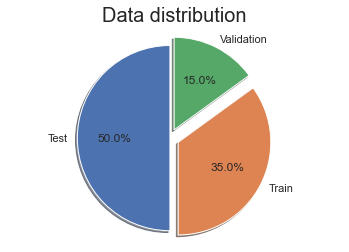

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
fig1, ax1 = plt.subplots()
ax1.pie([0.5,0.35,0.15], explode = [0,0.1, 0.1], labels=["Test", "Train", "Validation"], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Data distribution",fontsize=20)
plt.show()

In [40]:
x_train, x_test, y_train, y_test = preprocess_pipeline("Data/C50train", 2, bag_of_words, normalize =False,
                        save_path="./Data/clean/")

In [41]:
x_train

,00,000,0003,002,01,02,032,05,052,07,...,yugoslavia,zagreb,zagrebacka,zeman,zeros,zieleniec,zivnostenska,zombies,zone,zubizarreta
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1,0,1,0,1,0,1,0,0,...,0,2,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
66,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
x_test.shape

(30, 4322)

# Simple Model 

## KNN  

C:\Users\eviat\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


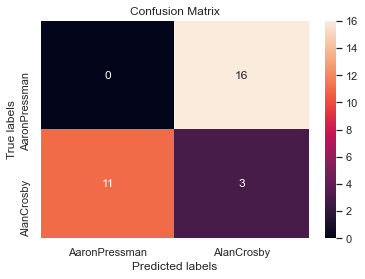

<Figure size 720x504 with 0 Axes>

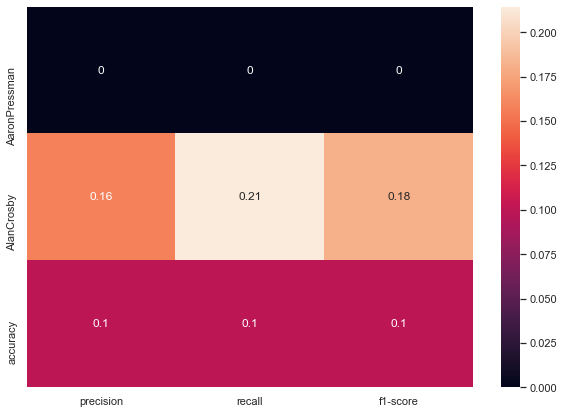

In [43]:
from sklearn.neighbors import KNeighborsClassifier
class KNN(Model):
    def train(self, x_train, y_train,**kwargs):
        self.mnb = KNeighborsClassifier(n_neighbors=10, weights= 'distance', p=2)
        self.mnb.fit(x_train, y_train)
        return self.mnb
    def predict(self,x_test):
        return self.mnb.predict(x_test)
KNN().pipeline(x_train, y_train, x_test.values, y_test,"simple KNN",do_cross_validation=False)
# KNN().pipeline(x_train, y_train, x_test.values, y_test,"simple KNN",do_cross_validation=False)

## Naive Bayes

C:\Users\eviat\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


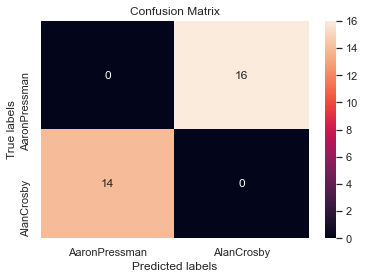

<Figure size 720x504 with 0 Axes>

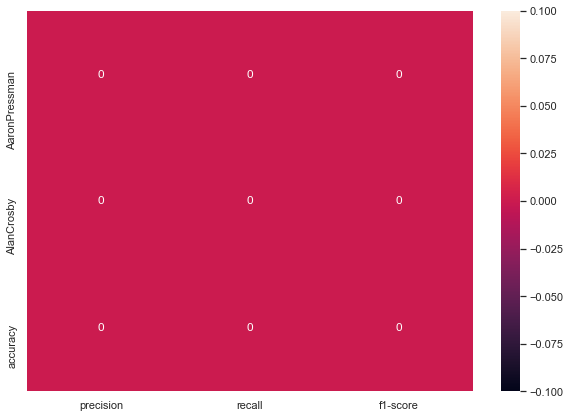

In [44]:
from sklearn.naive_bayes import MultinomialNB
class Naive_Bayes(Model):
    def train(self, x_train, y_train,**kwargs):
        self.mnb = MultinomialNB()
        self.mnb.fit(x_train, y_train)
        return self.mnb
    def predict(self,x_test):
        return self.mnb.predict(x_test)
Naive_Bayes().pipeline(x_train, y_train, x_test.values, y_test,"simple Naive Bayes 2 Authors",do_cross_validation=False)

# Feature selection

In [32]:
from sklearn.feature_selection import VarianceThreshold
column_names = x_train.columns 
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(x_train)
x_train = sel.transform(x_train)
x_test = x_test.drop([feature for feature in column_names if feature not in sel.get_feature_names_out()],axis=1)

In [33]:
x_test.shape 

(30, 706)

In [34]:
sel.get_feature_names_out()

array(['000', '0003', '10', '11', '12', '13', '14', '15', '150', '18',
       '1974', '1994', '1995', '1996', '20', '23', '25', '26', '28', '29',
       '31', '40', '41', '42', '639', '68', '70', '85', 'about', 'access',
       'according', 'act', 'action', 'activities', 'added', 'address',
       'addresses', 'administration', 'after', 'against', 'agency',
       'agents', 'ahead', 'all', 'alliance', 'allow', 'allowed',
       'allowing', 'already', 'also', 'although', 'amato', 'amendment',
       'america', 'among', 'amp', 'an', 'analyst', 'analysts', 'and',
       'another', 'any', 'approach', 'april', 'are', 'argued', 'as',
       'association', 'at', 'august', 'authority', 'available', 'back',
       'bank', 'banka', 'bankers', 'banking', 'banks', 'based', 'battle',
       'be', 'because', 'becker', 'been', 'before', 'berger', 'between',
       'big', 'bill', 'billion', 'bills', 'bit', 'board', 'body', 'bond',
       'boost', 'boris', 'both', 'bourse', 'bratislava', 'break',
     

In [70]:
xx = pd.DataFrame(data=x_train, columns= sel.get_feature_names_out())
xx.sum().sort_values(ascending = False)[:30]

the         2310.0
of           845.0
to           774.0
in           612.0
and          567.0
said         358.0
on           320.0
that         306.0
for          280.0
be           209.0
at           203.0
is           201.0
but          195.0
by           186.0
with         182.0
it           179.0
from         172.0
as           167.0
internet     155.0
have         155.0
not          142.0
was          133.0
will         126.0
an           124.0
would        119.0
he           104.0
this         103.0
percent      101.0
which         95.0
year          95.0
dtype: float64

In [69]:
y_train_ = pd.DataFrame(data = y_train, columns=["label"])
tmp = pd.concat((x_train,y_train_), axis=1)
tmp

,00,000,0003,002,01,02,032,05,052,07,...,zagreb,zagrebacka,zeman,zeros,zieleniec,zivnostenska,zombies,zone,zubizarreta,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1,0,1,0,1,0,1,0,0,...,2,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
66,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [160]:
ch = tmp.groupby(["label"]).sum()
ch

,00,000,0003,002,01,02,032,05,052,07,...,yugoslavia,zagreb,zagrebacka,zeman,zeros,zieleniec,zivnostenska,zombies,zone,zubizarreta
label,,,,,,,,,,,,,,,,,,,,,
0,1,8,0,0,0,0,2,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,5,15,13,2,1,2,0,1,1,1,...,2,5,1,4,0,1,4,2,0,3


In [171]:
s = ch.sum()
# df[s.sort_values(ascending=False).index[:2]]
c1 = ch.iloc[1:,:]
c0 = ch.iloc[:1,:]

In [197]:
res_0 = ch.values[0]
res_1 = ch.values[1]
ress = abs(res_1 -res_0) >40
col_name = ch.columns
res_0 = res_0[ress == True]
res_1 = res_1[ress == True]
diff_col = col_name[ress == True]
diff_col

Index(['analysts', 'and', 'at', 'banks', 'be', 'by', 'companies', 'congress',
       'crowns', 'czech', 'encryption', 'financial', 'first', 'his', 'in',
       'internet', 'is', 'market', 'new', 'of', 'or', 'percent', 'policy',
       'round', 'said', 'second', 'that', 'the', 'to', 'was'],
      dtype='object')

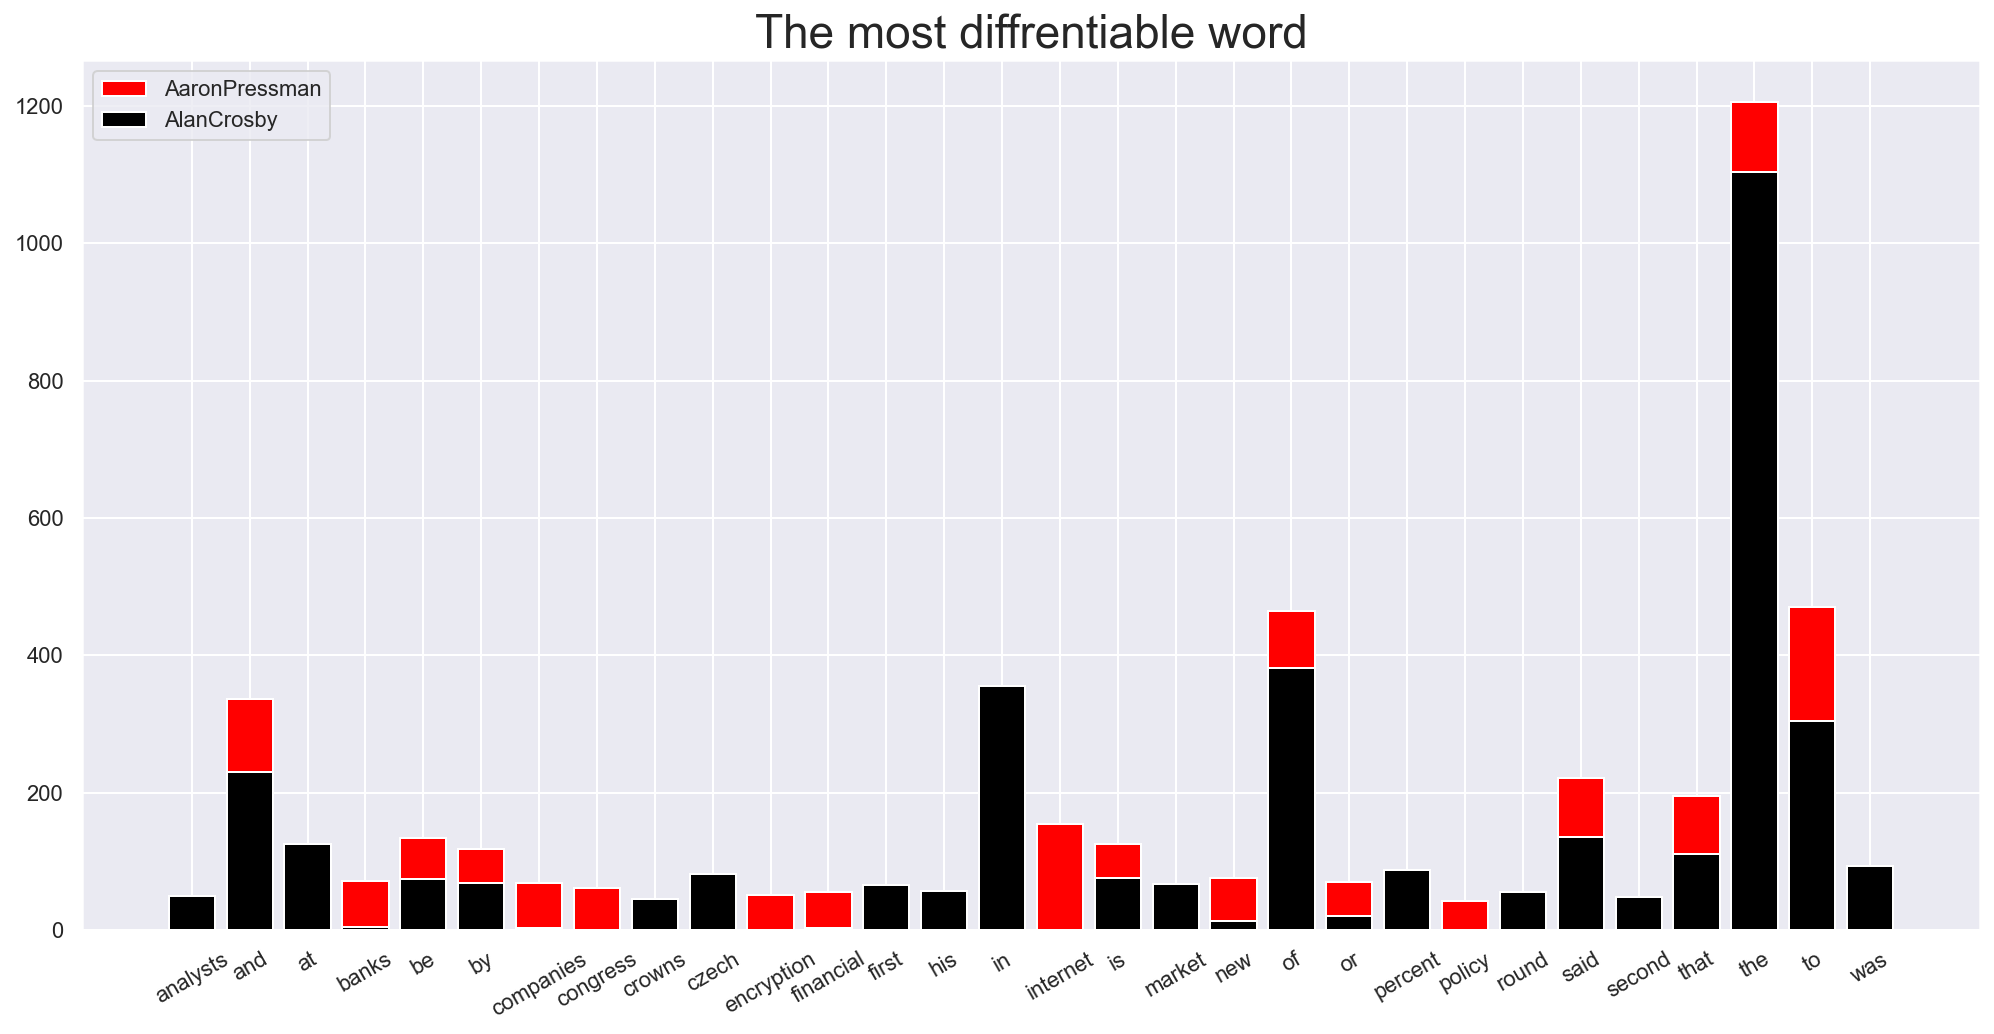

In [234]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)
from matplotlib.pyplot import figure
figure(figsize=(17, 8))
plt.title("The most diffrentiable word", size =23)
plt.bar(diff_col,height = res_0,color= 'red')
plt.bar(diff_col,height = res_1, color = 'black')
plt.xticks(rotation=30)
plt.legend(["AaronPressman","AlanCrosby"])
plt.show()

In [199]:
ch["and"]

label
0    337
1    230
Name: and, dtype: int64

In [110]:
ch["that"]

label
0    195
1    111
Name: that, dtype: int64

In [111]:
ch["of"]

label
0    464
1    381
Name: of, dtype: int64

In [106]:
ch["to"]

label
0    470
1    304
Name: to, dtype: int64

In [107]:
ch["internet"]

label
0    155
1      0
Name: internet, dtype: int64

In [108]:
ch["the"]

label
0    1206
1    1104
Name: the, dtype: int64

In [116]:
len(res_1)

4322

In [150]:
ss =tmp[tmp["label"]==0]["internet"]
ss.values

array([ 2, 11,  7,  0,  0,  5,  0,  1,  3, 14,  0,  7, 12,  8,  0,  0,  8,
       11,  0,  7,  0,  2,  0,  9,  0,  0,  4, 11, 12,  0,  0,  0,  3,  0,
       18,  0], dtype=int64)

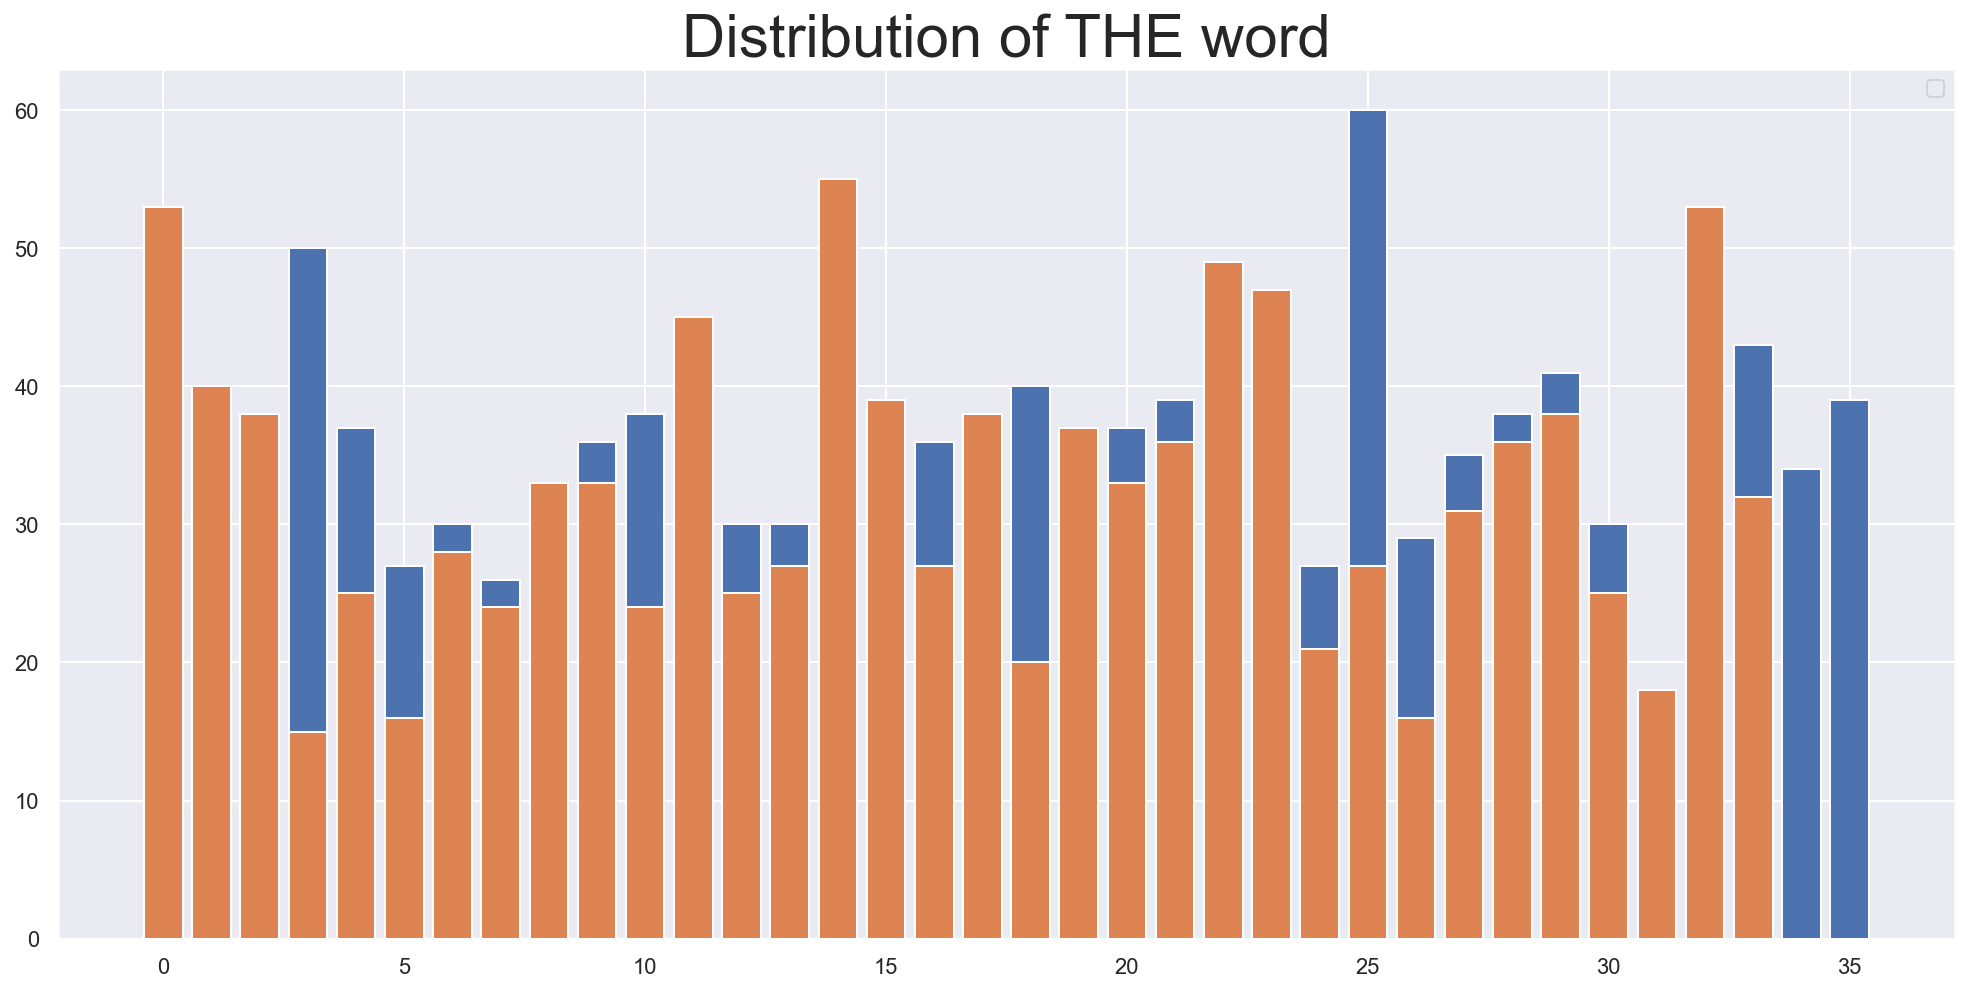

In [232]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)
from matplotlib.pyplot import figure
figure(figsize=(17, 8))
plt.title("Distribution of THE word", size =30)
ss1 =tmp[tmp["label"]==0]["the"]
ss1.values
ss2 =tmp[tmp["label"]==1]["the"]
ss1 = ss1.values
plt.legend(["AaronPressman","AlanCrosby"])
plt.bar([i for i in range(0, len(ss1))],height = ss1)
plt.bar([i for i in range(0, len(ss2))],height = ss2)
plt.show()

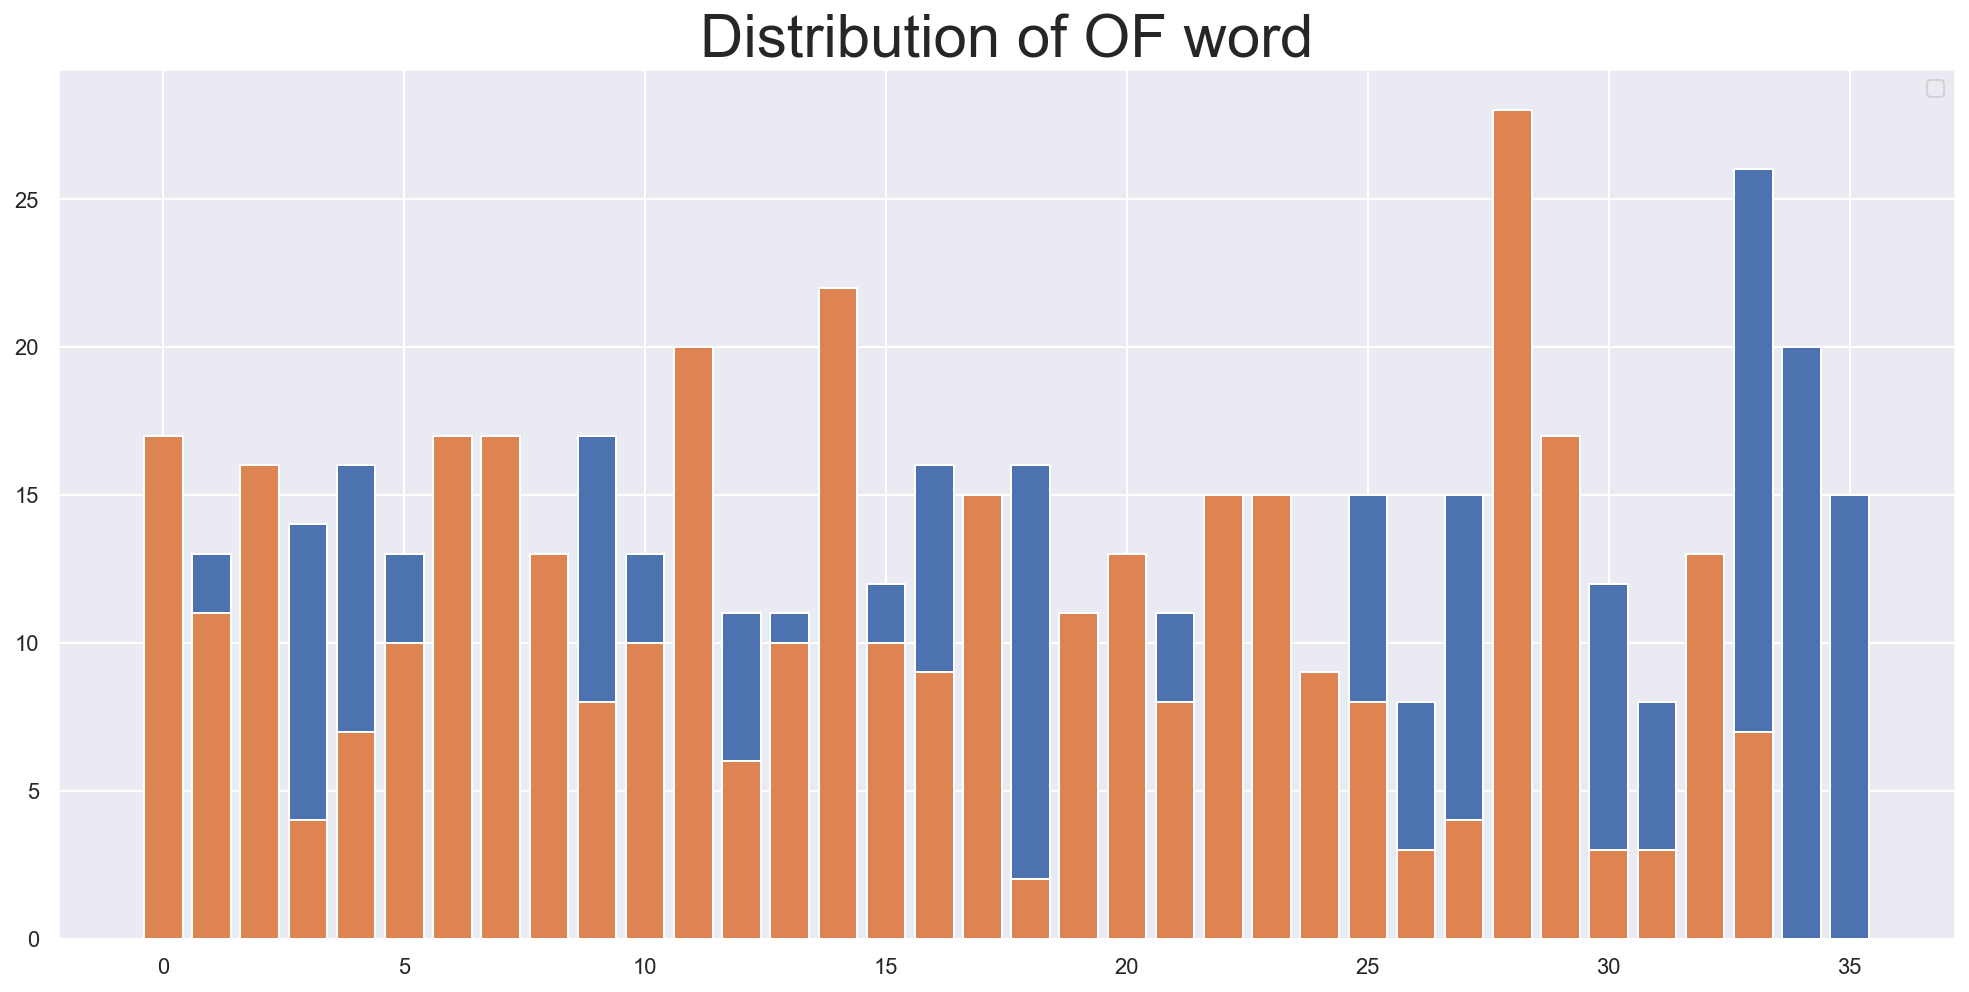

In [229]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)
from matplotlib.pyplot import figure
figure(figsize=(17, 8))
plt.title("Distribution of OF word", size =30)
ss1 =tmp[tmp["label"]==0]["of"]
ss1.values
ss2 =tmp[tmp["label"]==1]["of"]
plt.legend(["AaronPressman","AlanCrosby"])
ss1 = ss1.values
plt.bar([i for i in range(0, len(ss1))],height = ss1)
plt.bar([i for i in range(0, len(ss2))],height = ss2)
plt.show()

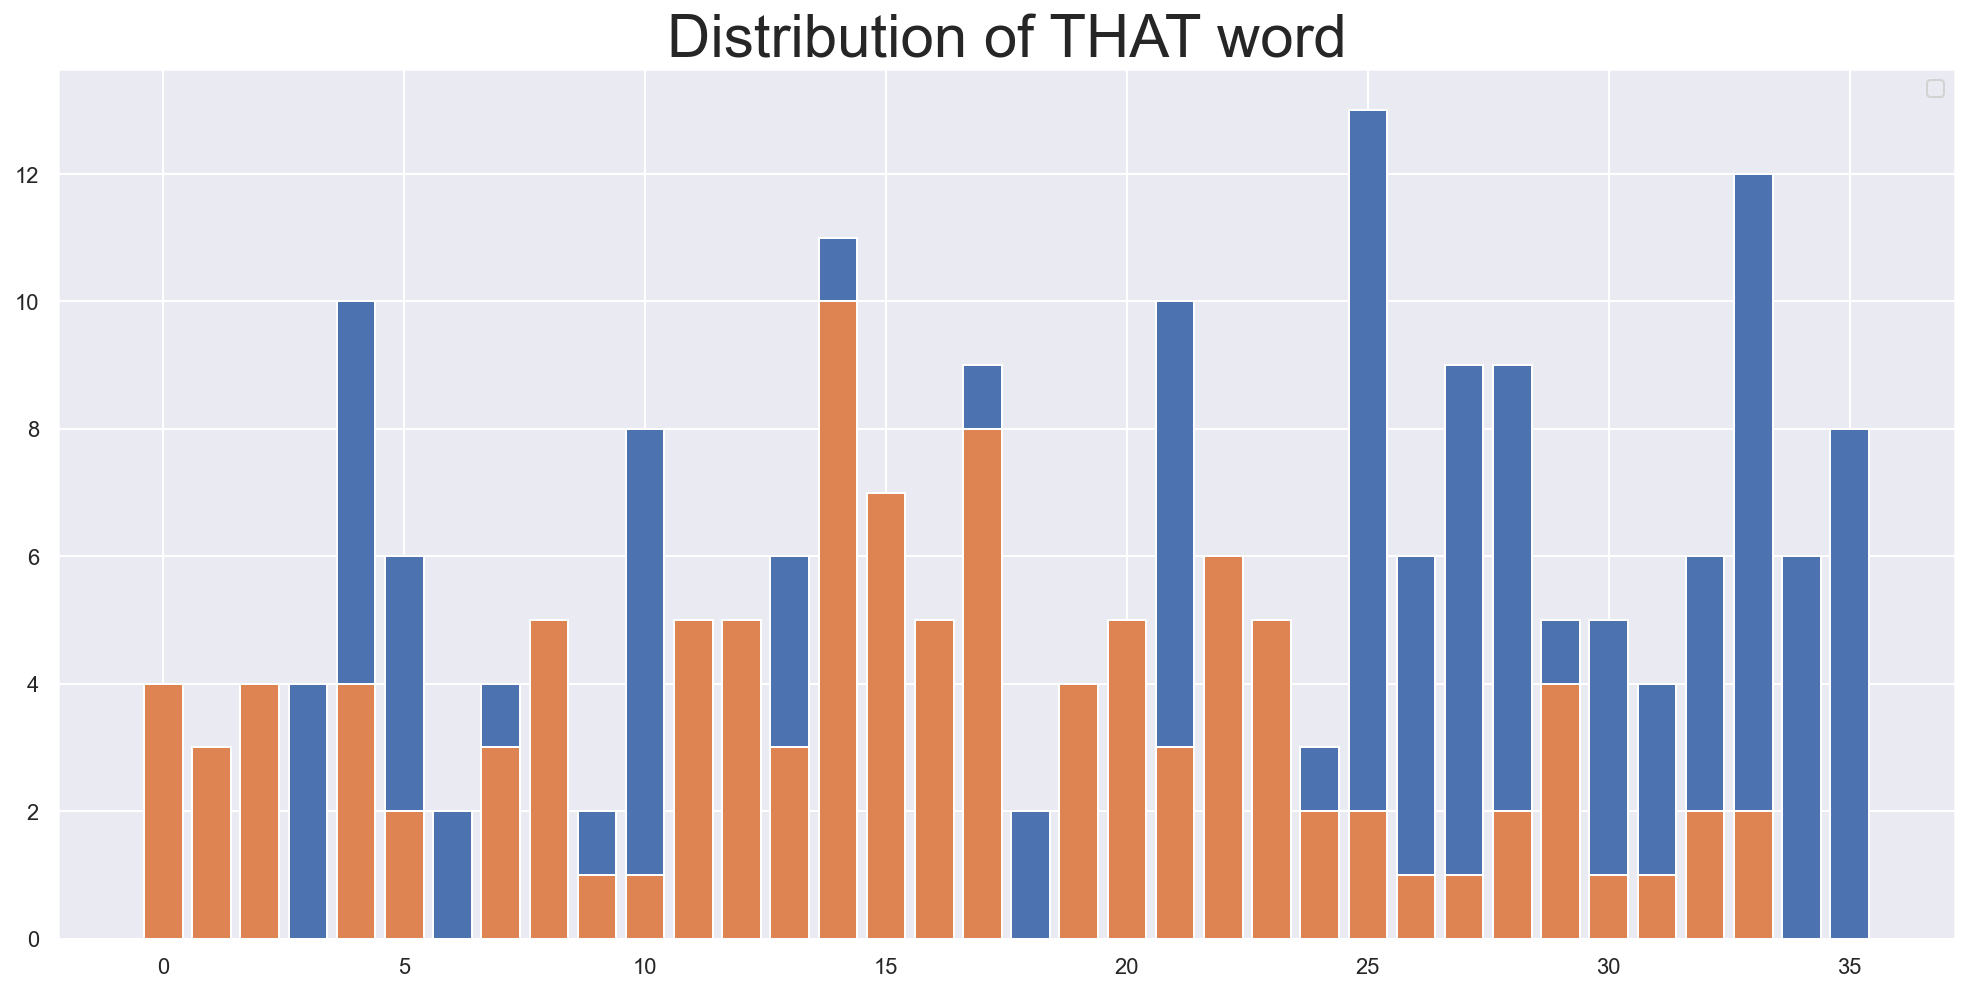

In [230]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)
from matplotlib.pyplot import figure
figure(figsize=(17, 8))
plt.title("Distribution of THAT word", size =30)
ss1 =tmp[tmp["label"]==0]["that"]
ss1.values
ss2 =tmp[tmp["label"]==1]["that"]
ss1 = ss1.values
plt.legend(["AaronPressman","AlanCrosby"])
plt.bar([i for i in range(0, len(ss1))],height = ss1)
plt.bar([i for i in range(0, len(ss2))],height = ss2)
plt.show()

In [ ]:
# ['analysts', 'and', 'at', 'banks', 'be', 'by', 'companies', 'congress',
#       'crowns', 'czech', 'encryption', 'financial', 'first', 'his', 'in',
#       'internet', 'is', 'market', 'new', 'of', 'or', 'percent', 'policy',
#       'round', 'said', 'second', 'that', 'the', 'to', 'was']

In [251]:
x_train = x_train[['and', 'at','be', 'by','first', 'his', 'in','' 'is','of', 'or', 'percent','round', 'said', 'second', 'that', 'the', 'to', 'was']]
x_test = x_test[['and', 'at','be', 'by','first', 'his', 'in', 'is','of', 'or', 'percent','round', 'said', 'second', 'that', 'the', 'to', 'was']]

In [252]:
x_test

,and,at,be,by,first,his,in,is,of,or,percent,round,said,second,that,the,to,was
0,7,3,4,3,1,0,12,3,10,0,0,0,2,1,1,20,7,1
1,14,1,3,6,0,0,6,2,16,0,0,0,7,0,4,37,14,3
2,4,1,0,1,1,1,6,2,9,0,2,0,5,1,2,21,6,2
3,6,0,2,3,3,1,10,0,19,2,3,6,2,3,6,55,8,3
4,5,1,3,0,1,0,6,6,6,2,0,0,9,0,5,24,13,1
5,6,1,2,2,1,0,7,0,7,1,3,0,3,1,4,25,7,2
6,7,5,2,2,0,0,14,2,13,2,0,0,8,0,2,37,14,2
7,9,4,4,4,0,0,10,3,10,0,2,0,3,0,2,34,16,1
8,8,3,2,8,0,0,3,4,21,1,1,0,14,3,7,36,18,0
9,6,3,6,2,1,0,3,5,12,4,0,0,5,0,8,40,21,1


C:\Users\eviat\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


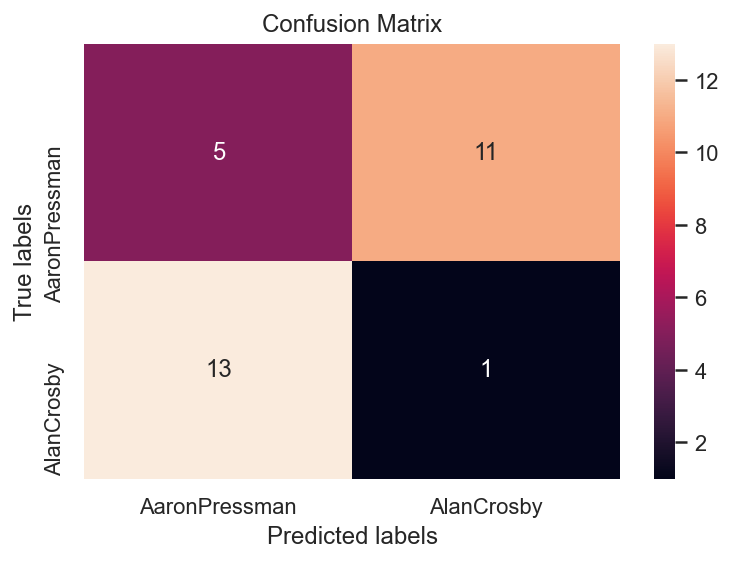

<Figure size 720x504 with 0 Axes>

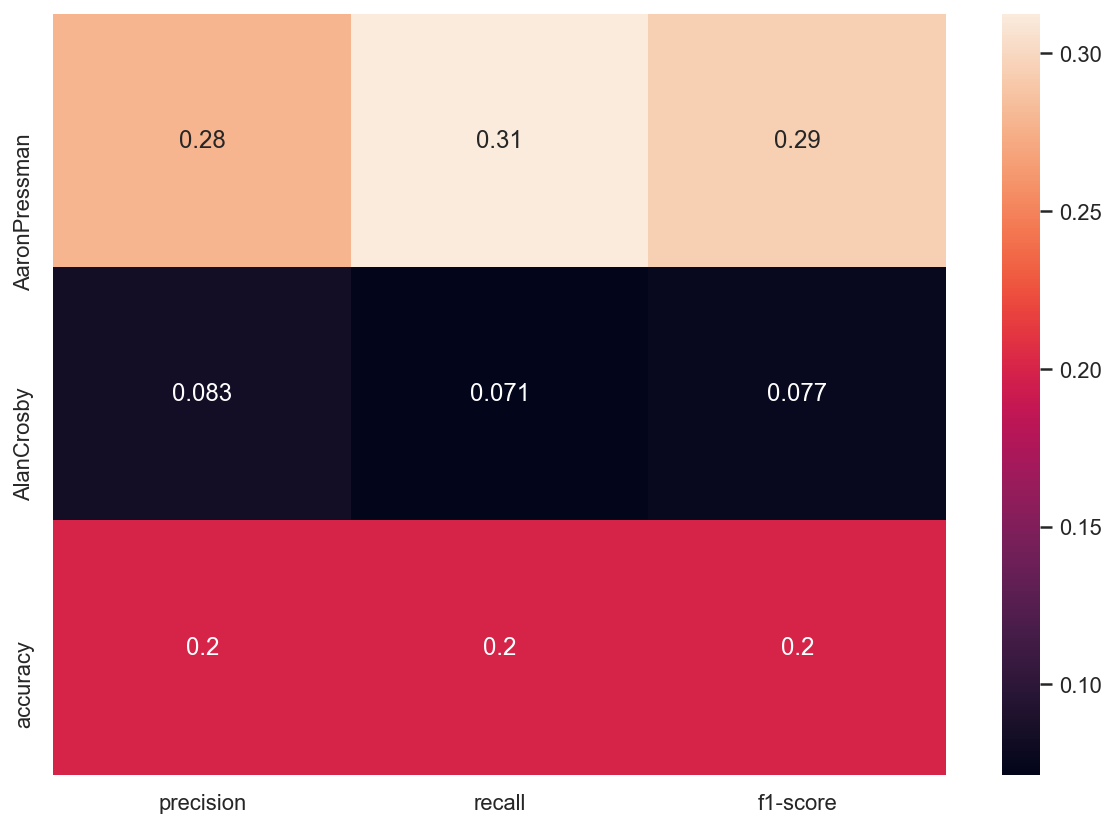

In [253]:
from sklearn.neighbors import KNeighborsClassifier
class KNN(Model):
    def train(self, x_train, y_train,**kwargs):
        self.mnb = KNeighborsClassifier(n_neighbors=10, weights= 'distance', p=2)
        self.mnb.fit(x_train, y_train)
        return self.mnb
    def predict(self,x_test):
        return self.mnb.predict(x_test)
KNN().pipeline(x_train, y_train, x_test.values, y_test,"simple KNN",do_cross_validation=False)
# KNN().pipeline(x_train, y_train, x_test.values, y_test,"simple KNN",do_cross_validation=False)

In [231]:
# num_of_points = 10000
# num_of_points2 = 30000
# num_of_bins = 20
# fig, ax = plt.subplots()
# ax.hist(res_0, bins=num_of_bins, edgecolor='black', alpha=0.3)
# ax.hist(res_1, bins=num_of_bins, edgecolor='black', alpha=0.3)
# ax.set_title("Histogram")
# ax.set_xlabel("X axis")
# ax.set_ylabel("Percentage")
# # ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(data2)))
# plt.show()

## Naive Bayes 

C:\Users\eviat\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


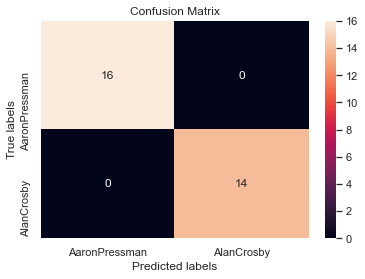

<Figure size 720x504 with 0 Axes>

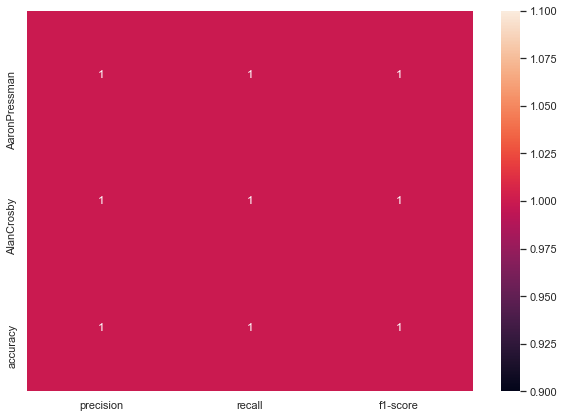

In [35]:
from sklearn.naive_bayes import MultinomialNB
class Naive_Bayes(Model):
    def train(self, x_train, y_train,**kwargs):
        self.mnb = MultinomialNB()
        self.mnb.fit(x_train, y_train)
        return self.mnb
    def predict(self,x_test):
        return self.mnb.predict(x_test)
# Naive_Bayes().pipeline(x_train, y_train, x_validation.values, y_validation,"simple Naive Bayes 2 Authors",do_cross_validation=False)
Naive_Bayes().pipeline(x_train, y_train, x_test, y_test,"simple Naive Bayes 2 Authors",do_cross_validation=False)

## KNN

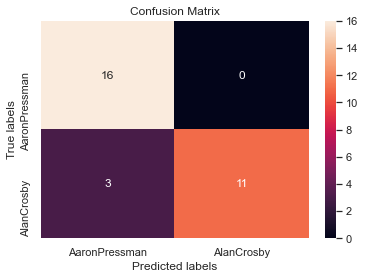

<Figure size 720x504 with 0 Axes>

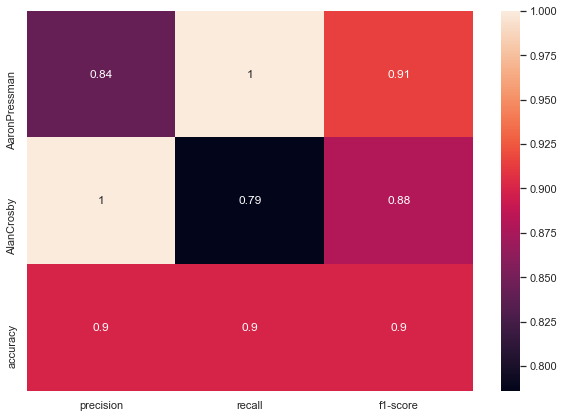

In [36]:
from sklearn.neighbors import KNeighborsClassifier
class KNN(Model):
    def train(self, x_train, y_train,**kwargs):
        self.mnb = KNeighborsClassifier(n_neighbors=4, weights= 'distance', p=2)
        self.mnb.fit(x_train, y_train)
        return self.mnb
    def predict(self,x_test):
        return self.mnb.predict(x_test)
KNN().pipeline(x_train, y_train, x_test.values, y_test,"simple KNN",do_cross_validation=False)

## Logistic Regression 

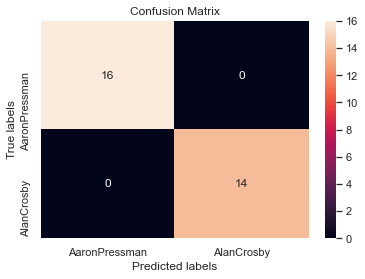

<Figure size 720x504 with 0 Axes>

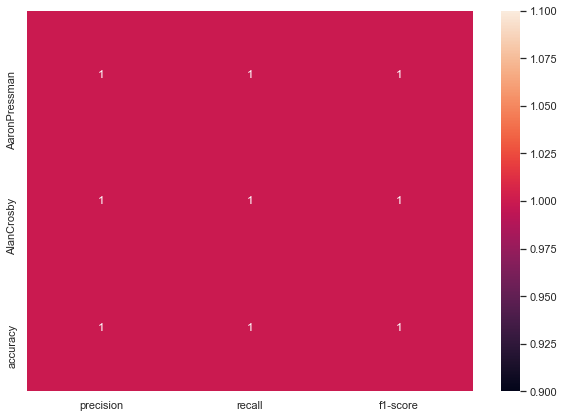

In [38]:
from sklearn.linear_model import SGDClassifier
class LogisticRegression(Model):
    def train(self, x_train, y_train,**kwargs):
        self.mnb = SGDClassifier(loss='log')
        self.mnb.fit(x_train, y_train)
        return self.mnb
    def predict(self,x_test):
        return self.mnb.predict(x_test)
LogisticRegression().pipeline(x_train, y_train, x_test.values, y_test.values,"LogisticRegression 2 Authors 1.1",do_cross_validation=False)

### pretty classification report 

In [184]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
mnb = SGDClassifier(loss='log')
mnb.fit(x_train, y_train)
pred = mnb.predict(x_test.values)
ss = classification_report(pred, y_test,output_dict=True)
print(ss)

{'0': {'precision': 0.98, 'recall': 0.98, 'f1-score': 0.98, 'support': 50}, '1': {'precision': 0.98, 'recall': 0.98, 'f1-score': 0.98, 'support': 50}, 'accuracy': 0.98, 'macro avg': {'precision': 0.98, 'recall': 0.98, 'f1-score': 0.98, 'support': 100}, 'weighted avg': {'precision': 0.98, 'recall': 0.98, 'f1-score': 0.98, 'support': 100}}


0.98

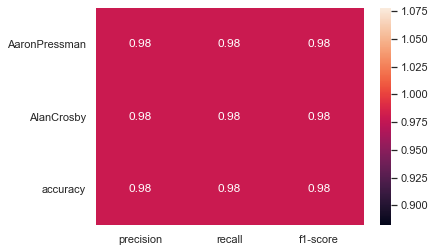

In [199]:
import seaborn as sns 
clf_report = classification_report(y_test, pred,target_names= ["AaronPressman","AlanCrosby"],output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :-2].T, annot=True)
clf_report['accuracy']